Pandas함수 정리: https://gaga.tistory.com/150

folium 사용가이드: https://iridescent-zeal.tistory.com/184

barplot 천단위 쉼표 및 라벨링: https://github.com/Park-Young-Bin/Python_Projects/blob/master/%EA%B7%B8%EB%9E%98%ED%94%84%20%EC%84%9C%EC%8B%9D%20%EC%84%A4%EC%A0%95(matplotlib,%20seaborn).ipynb

In [ ]:
# 코랩 폰트 깨짐 해결 ( plt.rc('font', family='NanumBarunGothic') )
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,265 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and dire

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import matplotlib.colors as colors
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [ ]:
file = r'/content/drive/MyDrive/실습/subway_raw.csv'
subway_raw=pd.read_csv(file)

In [ ]:
subway_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107028 entries, 0 to 107027
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   사용일자     107028 non-null  object 
 1   요일       107028 non-null  object 
 2   노선명      107028 non-null  object 
 3   역명       107028 non-null  object 
 4   승차총승객수   107028 non-null  float64
 5   하차총승객수   107028 non-null  float64
 6   승하차총승객수  107028 non-null  float64
 7   연월       107028 non-null  object 
 8   월일       107028 non-null  object 
 9   등록일자     107028 non-null  int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 8.2+ MB


<h1>Q) 2019.01~06 중 언제 지하철을 가장 많이 이용했을까? (기준: 승하차승객수)</h1>

In [ ]:
group_date=subway_raw.groupby(['월일'])['승하차총승객수'].agg(['sum'])\
                    .sort_values('sum', ascending=False)
group_date=group_date.head(5)
group_date

,sum
월일,
05-03,18425509.0
05-10,18297824.0
05-24,18107448.0
05-17,18085208.0
04-12,17992610.0


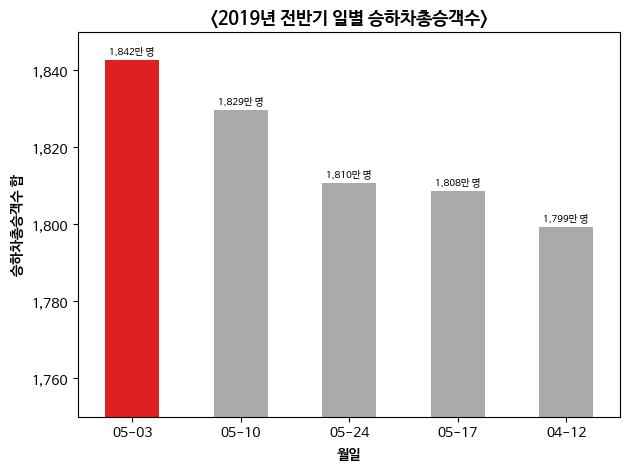

In [ ]:
#bar 시각화
fig, ax = plt.subplots(figsize=(7, 5))

plt.rc('font', family='NanumBarunGothic')
palette = ['#aaaaaa' if (x < max(group_date['sum'])) else '#ff0000' for x in group_date['sum']]
splot = sns.barplot(x=group_date.index, y=group_date['sum']/10000,
                    hue=group_date.index, palette = palette, width=0.5)
splot.set(ylim=(1750,1850))
plt.ticklabel_format(style='plain', axis='y') #지수형식을 숫자형식으로 바꿔줌
plt.title("<2019년 전반기 일별 승하차총승객수>", size=13, weight='bold')
plt.xlabel('월일', weight='bold')
plt.ylabel('승하차총승객수 합', weight='bold')
## 천단위 콤마 표시(y축)
def yfunc(y, pos):
    s = '{:0,d}'.format(int(y))
    return s
y_format = tkr.FuncFormatter(yfunc)
ax.yaxis.set_major_formatter(y_format)
## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}만 명".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=7, xytext=(0, 6),
                   textcoords='offset points')

<h1>가설1) 1월~6월 중 5월에 지하철 승객수가 많다

In [ ]:
group_month=subway_raw.groupby('연월')['승하차총승객수'].agg(['sum'])
avg_of_sum_month=group_month['sum'].mean()/10000
group_month

,sum
연월,
2019-01,442746389.0
2019-02,379836010.0
2019-03,466692826.0
2019-04,470934348.0
2019-05,485718557.0
2019-06,442210635.0


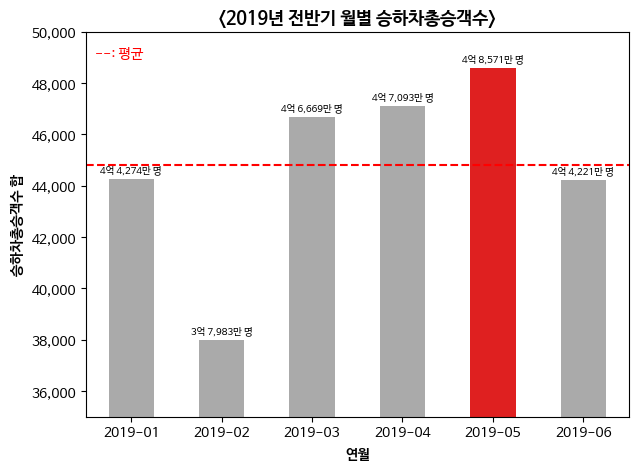

In [ ]:
#bar 시각화
fig, ax = plt.subplots(figsize=(7, 5))

plt.rc('font', family='NanumBarunGothic')
palette = ['#aaaaaa' if (x < max(group_month['sum'])) else '#ff0000' for x in group_month['sum']]
splot = sns.barplot(x=group_month.index, y=group_month['sum']/10000,
                    hue=group_month.index, palette = palette, width=0.5)
splot.set( ylim=(35000,50000))
# sns.pointplot(x=group_month.index, y=group_month['승하차총승객수']['sum']/10000, color='black', linewidth=1.5)
plt.ticklabel_format(style='plain', axis='y') #지수형식을 숫자형식으로 바꿔줌
plt.title("<2019년 전반기 월별 승하차총승객수>", size=13, weight='bold')
plt.xlabel('연월', weight='bold')
plt.ylabel('승하차총승객수 합', weight='bold')
plt.axhline(y = avg_of_sum_month, color = 'red', linestyle = '--')
plt.text(-0.4, 49000, '--: 평균', color='red')
## 천단위 콤마 표시(y축)
def yfunc(y, pos):
    s = '{:0,d}'.format(int(y))
    return s
y_format = tkr.FuncFormatter(yfunc)
ax.yaxis.set_major_formatter(y_format)
## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{}억 {:,}만 명".format(int(bar.get_height()/10000),int(bar.get_height()%10000)), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=7, xytext=(0, 6),
                   textcoords='offset points')


In [ ]:
group_day=subway_raw.groupby('요일')['승하차총승객수'].agg(['sum'])
group_day=group_day.reindex(['월','화','수','목','금','토','일'])
avg_of_sum_day=group_day['sum'].mean()/10000
group_day

,sum
요일,
월,391555551.0
화,411979965.0
수,421134136.0
목,428684383.0
금,445310717.0
토,341950018.0
일,247523995.0


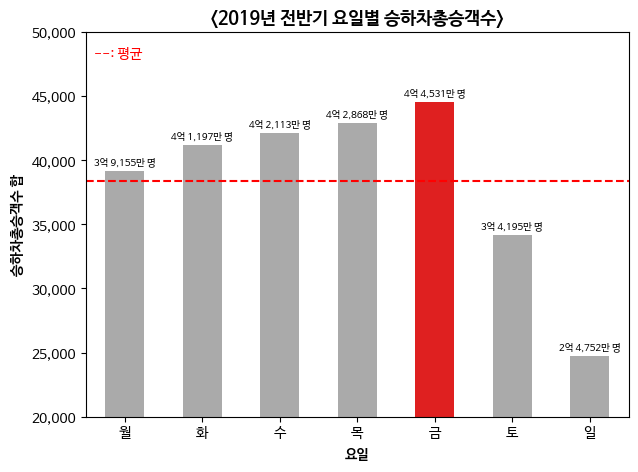

In [ ]:
#bar 시각화
fig, ax = plt.subplots(figsize=(7, 5))

plt.rc('font', family='NanumBarunGothic')
palette = ['#aaaaaa' if (x < max(group_day['sum'])) else '#ff0000' for x in group_day['sum']]
splot = sns.barplot(x=group_day.index, y=group_day['sum']/10000,
            hue=group_day.index, palette = palette, width=0.5)
splot.set( ylim=(20000,50000))
#sns.pointplot(x=group_day.index, y=group_day['승하차총승객수']['sum']/10000, color='black', linewidth=1.5)
plt.ticklabel_format(style='plain', axis='y') #지수형식을 숫자형식으로 바꿔줌
plt.title("<2019년 전반기 요일별 승하차총승객수>", size=13, weight='bold')
plt.xlabel('요일', weight='bold')
plt.ylabel('승하차총승객수 합', weight='bold')
plt.axhline(y = avg_of_sum_day, color = 'red', linestyle = '--')
plt.text(-0.4, 48000, '--: 평균', color='red')
## 천단위 콤마 표시(y축)
def yfunc(y, pos):
    s = '{:0,d}'.format(int(y))
    return s
y_format = tkr.FuncFormatter(yfunc)
ax.yaxis.set_major_formatter(y_format)
## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{}억 {:,}만 명".format(int(bar.get_height()//10000),int(bar.get_height()%10000)), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=7, xytext=(0, 6),
                   textcoords='offset points')

<h1>Q) 연월 각각에 대해 일자별(월일별) 승하차총승객수 그래프 그려볼까요? (pointplot))</h1>

In [ ]:
pointplot_day = subway_raw.groupby("사용일자")['승하차총승객수'].agg('sum')
pointplot_day=pointplot_day.reset_index()
pointplot_day.head(5)

,사용일자,승하차총승객수
0,2019-01-01,6813453.0
1,2019-01-02,15214002.0
2,2019-01-03,15716213.0
3,2019-01-04,16509281.0
4,2019-01-05,12092335.0


In [ ]:
pointplot_day['사용일자']=pd.to_datetime(pointplot_day['사용일자'])
pointplot_day['일'] = pointplot_day['사용일자'].dt.strftime("%d")

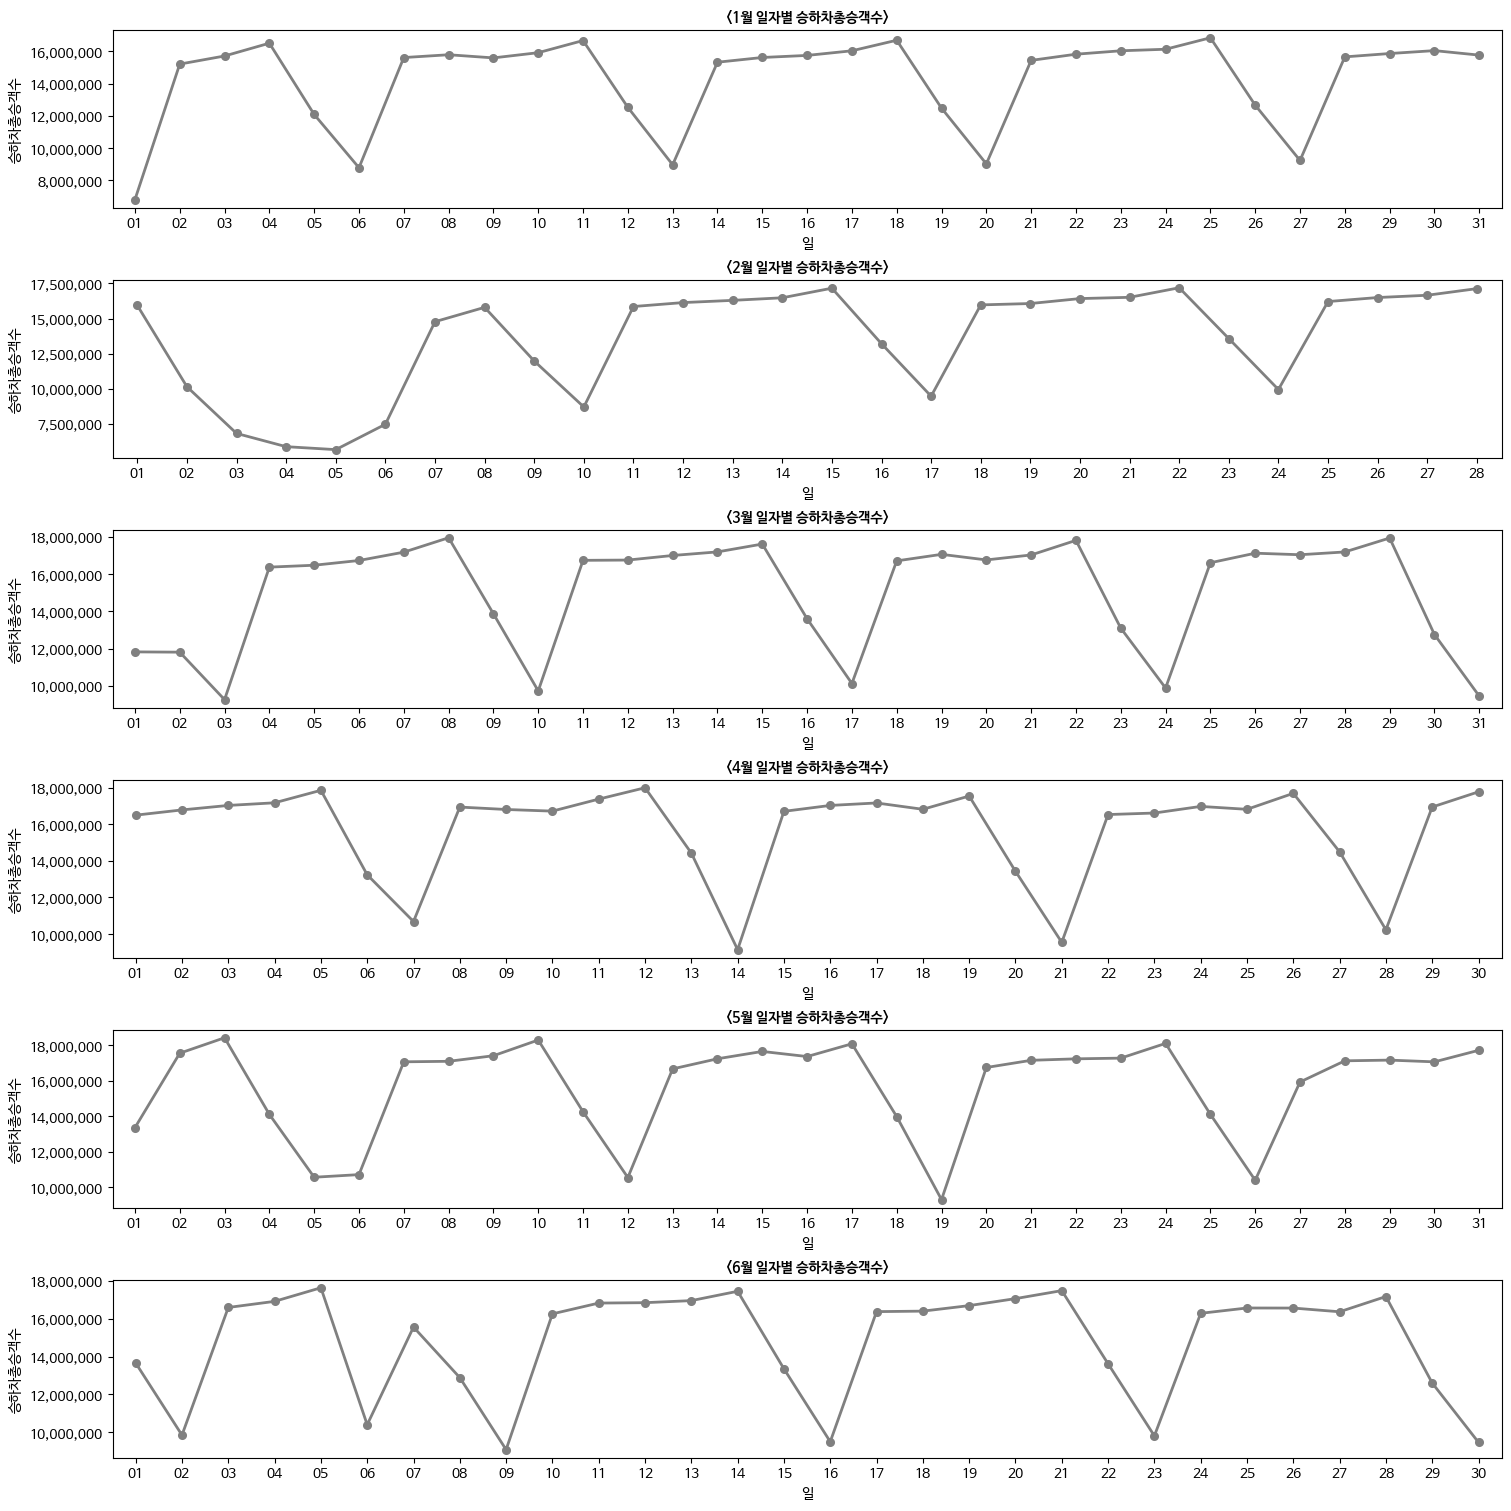

In [ ]:
# fig( figure ): 그래프를 그릴 수 있는 캔버스 역할을 함
# axes: 3*2 배열
fig, axes = plt.subplots(constrained_layout=True, nrows=6, ncols=1, figsize=(15, 15))

dayLst = [31, 28, 31, 30, 31, 30]
hap = 0

def yfunc(y, pos):
    s = '{:0,d}'.format(int(y))
    return s

# enumerate: 인덱스와 값을 동시에 불러옴
for idx, day in enumerate(dayLst):
    row = idx
    col = 0

    month = idx+1

    sns.pointplot(x="일", y="승하차총승객수", data=pointplot_day[hap:hap+day], ax=axes[row], color='gray', linewidth=2)
    axes[row].set_title(f"<{month}월 일자별 승하차총승객수>", size=10, weight='bold')

    hap += day
    axes[row].ticklabel_format(style='plain', axis='y')
    ## 천단위 콤마 표시(y축)
    y_format = tkr.FuncFormatter(yfunc)
    axes[row].yaxis.set_major_formatter(y_format)


<h1>Q) 가장 승객이 많이 타는 승차역은?</h1>

In [ ]:
group_station=subway_raw.groupby('역명')['승차총승객수'].agg(['sum'])\
              .sort_values('sum', ascending=False)
# 상위 5개 역만 확인
group_station=group_station.head(5)
group_station

,sum
역명,
잠실,18574323.0
강남,18148024.0
고속터미널,17541287.0
홍대입구,17270084.0
서울역,17165598.0


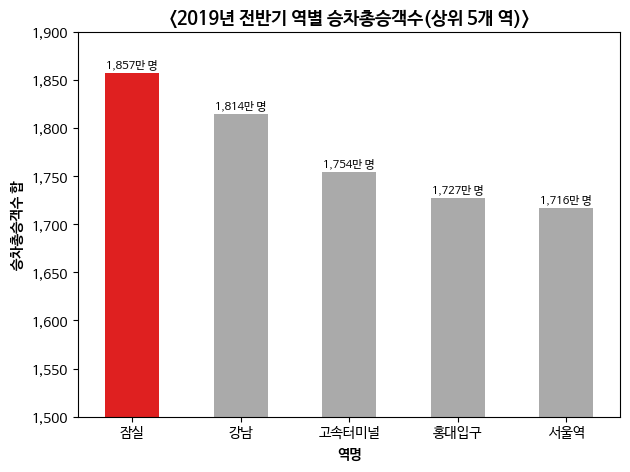

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.rc('font', family='NanumBarunGothic')
palette = ['#aaaaaa' if (x < max(group_station['sum'])) else '#ff0000' for x in group_station['sum']]
splot = sns.barplot(x=group_station.index, y=group_station['sum']/10000,
                    hue=group_station.index, palette=palette, width=0.5)
splot.set(ylim=(1500,1900))
plt.ticklabel_format(style='plain', axis='y')
plt.title('<2019년 전반기 역별 승차총승객수(상위 5개 역)>', size=13,  weight='bold')
plt.xlabel('역명', weight='bold')
plt.ylabel('승차총승객수 합', weight='bold')
## 천단위 콤마 표시(y축)
def yfunc(y, pos):
    s = '{:0,d}'.format(int(y))
    return s
y_format = tkr.FuncFormatter(yfunc)
ax.yaxis.set_major_formatter(y_format)
## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}만 명".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 6),
                   textcoords='offset points')
plt.show()

<h1>Q) 노선별로 역별/요일별 승차승객수를 비교해 볼수 있을까? (1~9호선,역별/요일별 heatmap)</h1>

Text(0.5, 1.0, '노선별/요일별 승차총승객수 합')

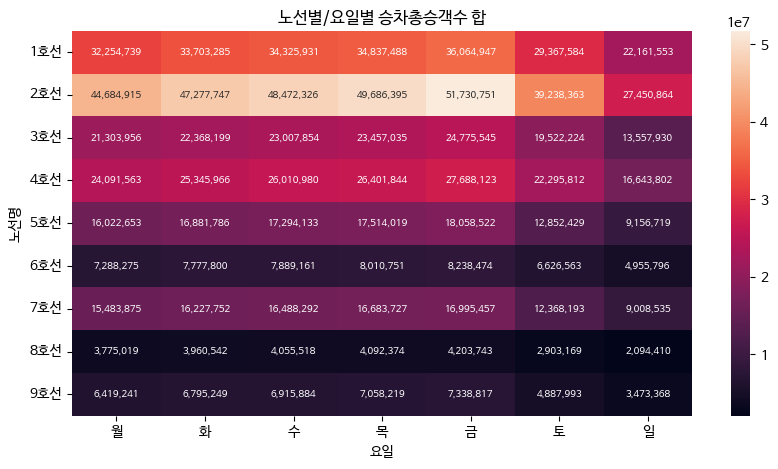

In [ ]:

# heatmap을 나타내려면 데이터프레임을 피벗테이블 형태로 바꿔줘야 함
# 1~9호선만 취급
dfHeat = subway_raw.pivot_table(index="노선명", columns="요일", values="승차총승객수", aggfunc = 'sum')[:9]
dfHeat = dfHeat.reindex(columns=["월", "화", "수", "목", "금", "토", "일"])

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(dfHeat, annot=True, fmt=',.0f', annot_kws={"fontsize": 7})
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title("노선별/요일별 승차총승객수 합")

In [ ]:
group_station_gasan=subway_raw.query('역명=="가산디지털단지"')\
                            .groupby(['역명','요일'])['승차총승객수'].agg(['sum'])
group_station_gasan.head(7)

sum
역명      요일           
가산디지털단지 금   1815630.0
        목   1810008.0
        수   1778368.0
        월   1701356.0
        일    537274.0
        토    702145.0
        화   1766536.0

Text(0.5, 1.0, '1호선 역별/요일별 승차총승객수 합')

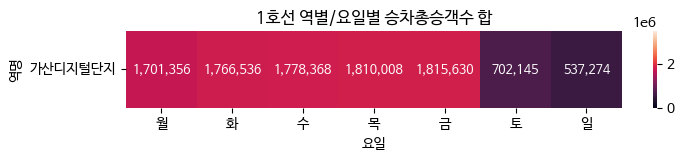

In [ ]:
dfPivot_1 = group_station_gasan.pivot_table(index="역명", columns="요일", values="sum", aggfunc = 'sum')
dfPivot_1 = dfPivot_1.reindex(columns=["월", "화", "수", "목", "금", "토", "일"])

fig, ax = plt.subplots(figsize=(8, 1))
norm = colors.Normalize(vmin=0, vmax=3500000)
sns.heatmap(dfPivot_1, annot=True, fmt=',.0f', annot_kws={"fontsize": 9}, norm=norm)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title("1호선 역별/요일별 승차총승객수 합")

In [ ]:
group_station_zamsil=subway_raw.query('역명=="잠실"')\
                            .groupby(['역명','요일'])['승차총승객수'].agg(['sum'])
group_station_zamsil

sum
역명 요일           
잠실 금   3007828.0
   목   2823927.0
   수   2730625.0
   월   2497555.0
   일   2049232.0
   토   2806534.0
   화   2658622.0

Text(0.5, 1.0, '2호선 역별/요일별 승차총승객수 합')

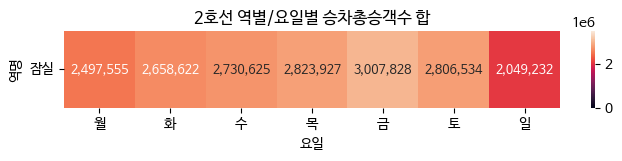

In [ ]:
dfPivot_2 = group_station_zamsil.pivot_table(index="역명", columns="요일", values="sum", aggfunc = 'sum')
dfPivot_2 = dfPivot_2.reindex(columns=["월", "화", "수", "목", "금", "토", "일"])

fig, ax = plt.subplots(figsize=(8, 1))
norm = colors.Normalize(vmin=0, vmax=3500000)
sns.heatmap(dfPivot_2, annot=True, fmt=',.0f', annot_kws={"fontsize": 9}, norm=norm)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title("2호선 역별/요일별 승차총승객수 합")

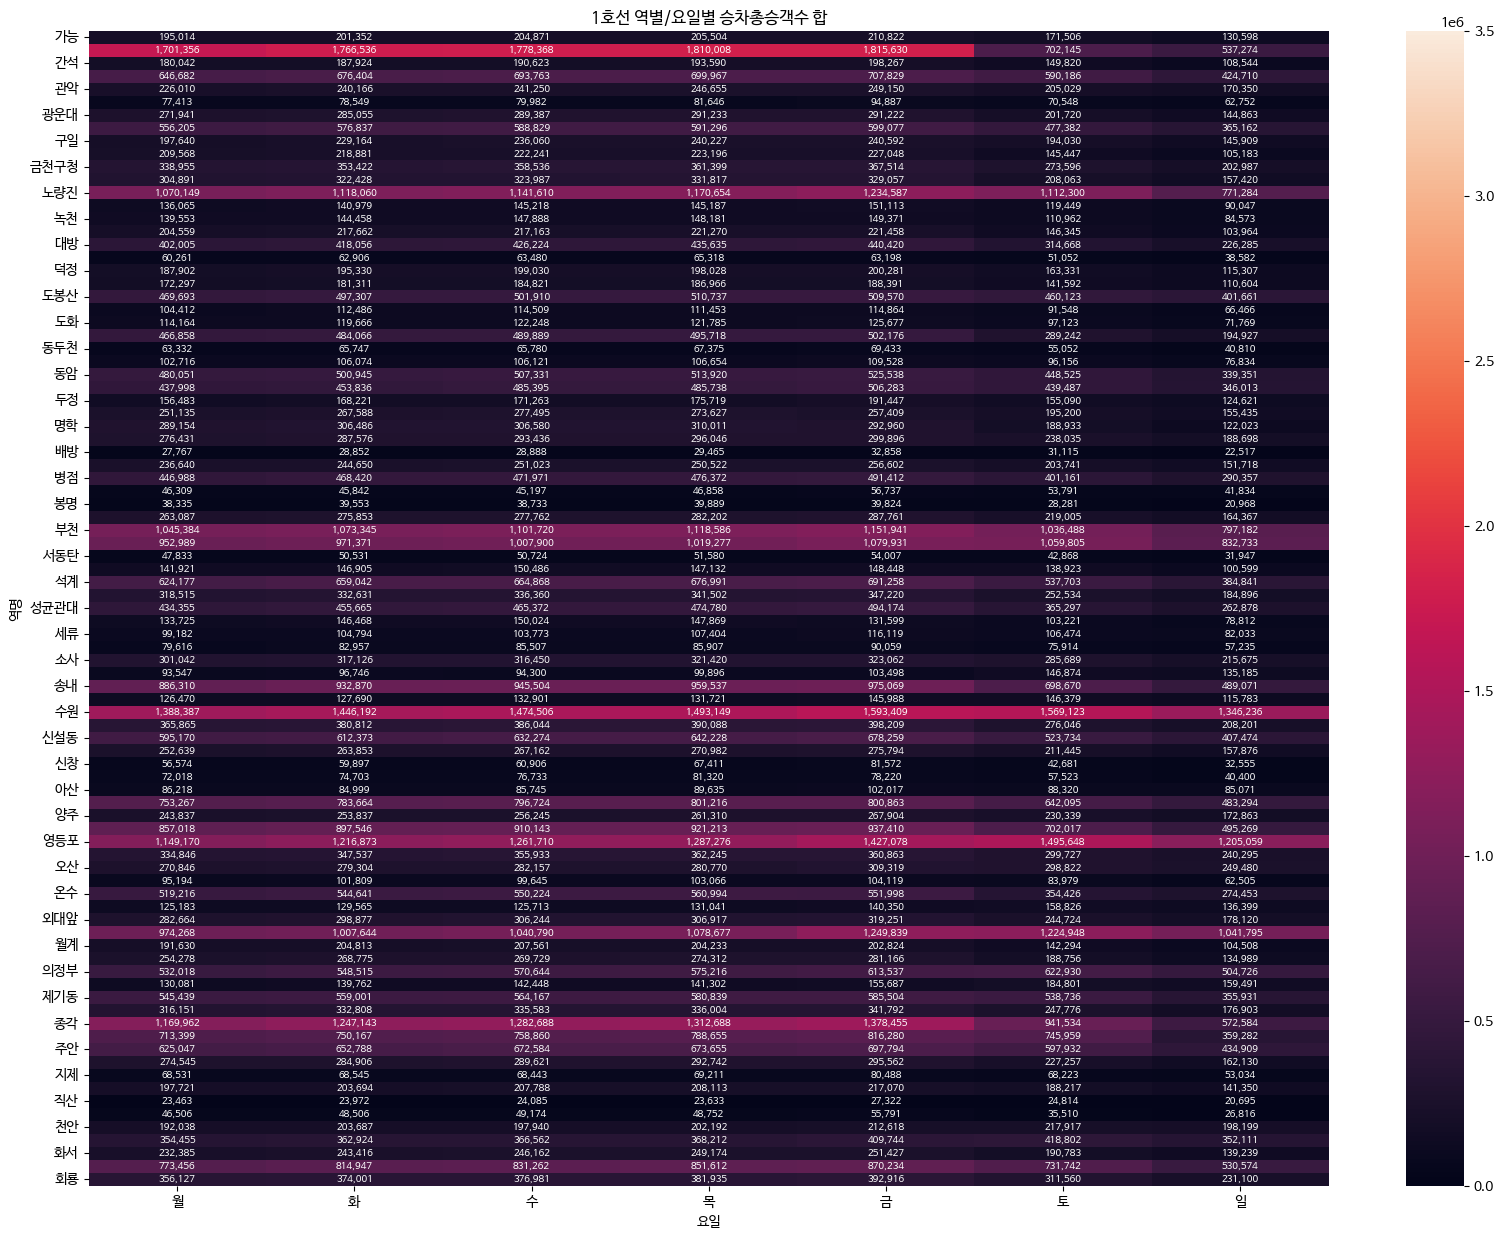

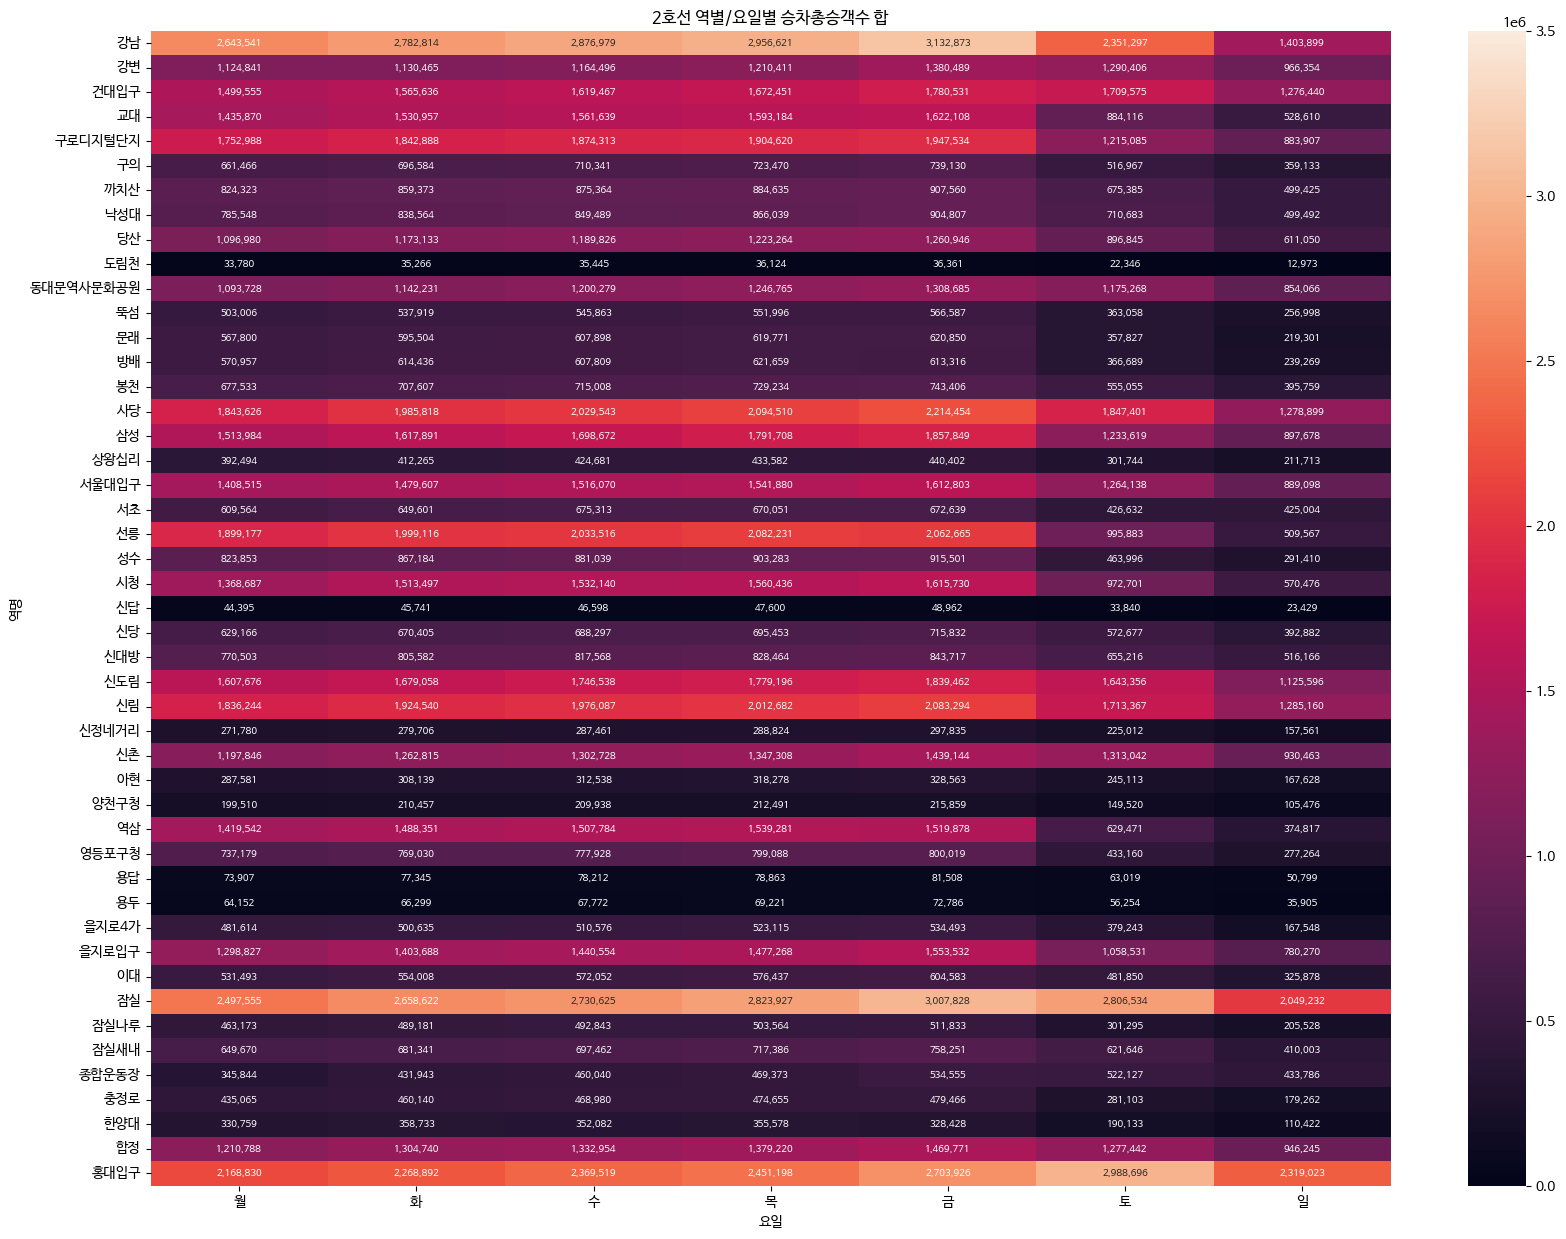

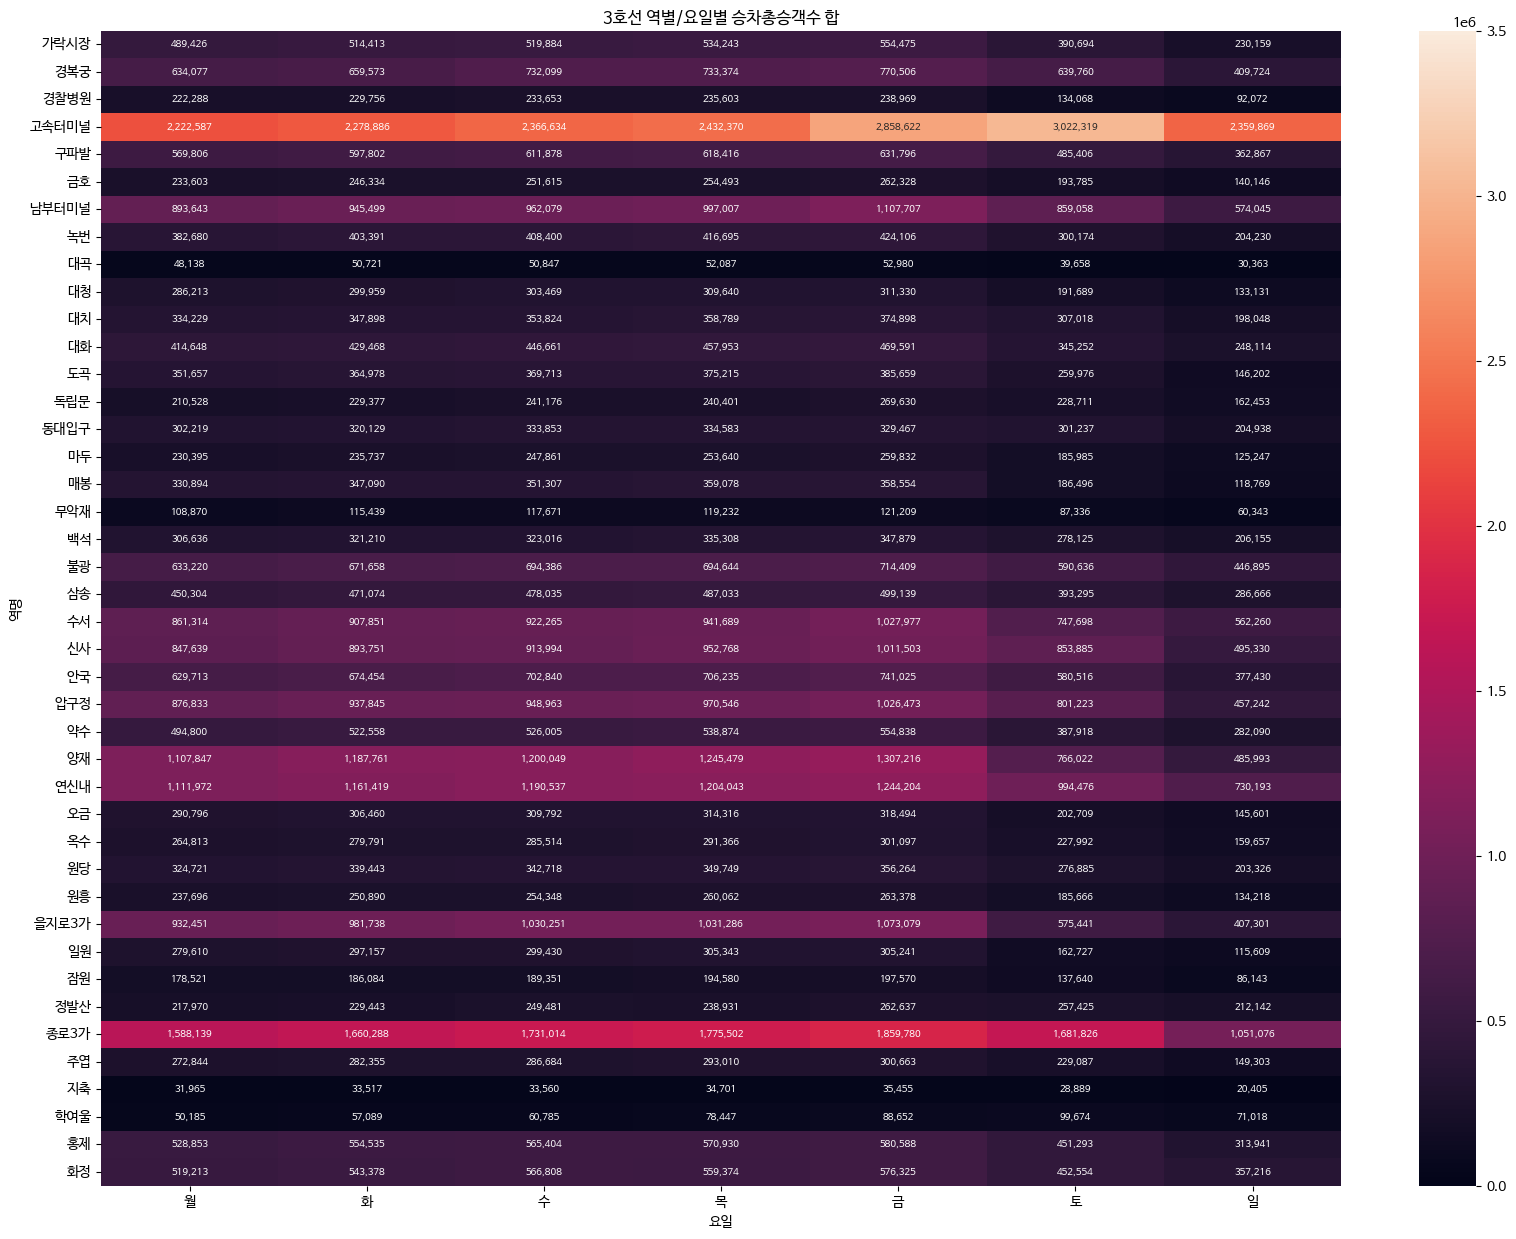

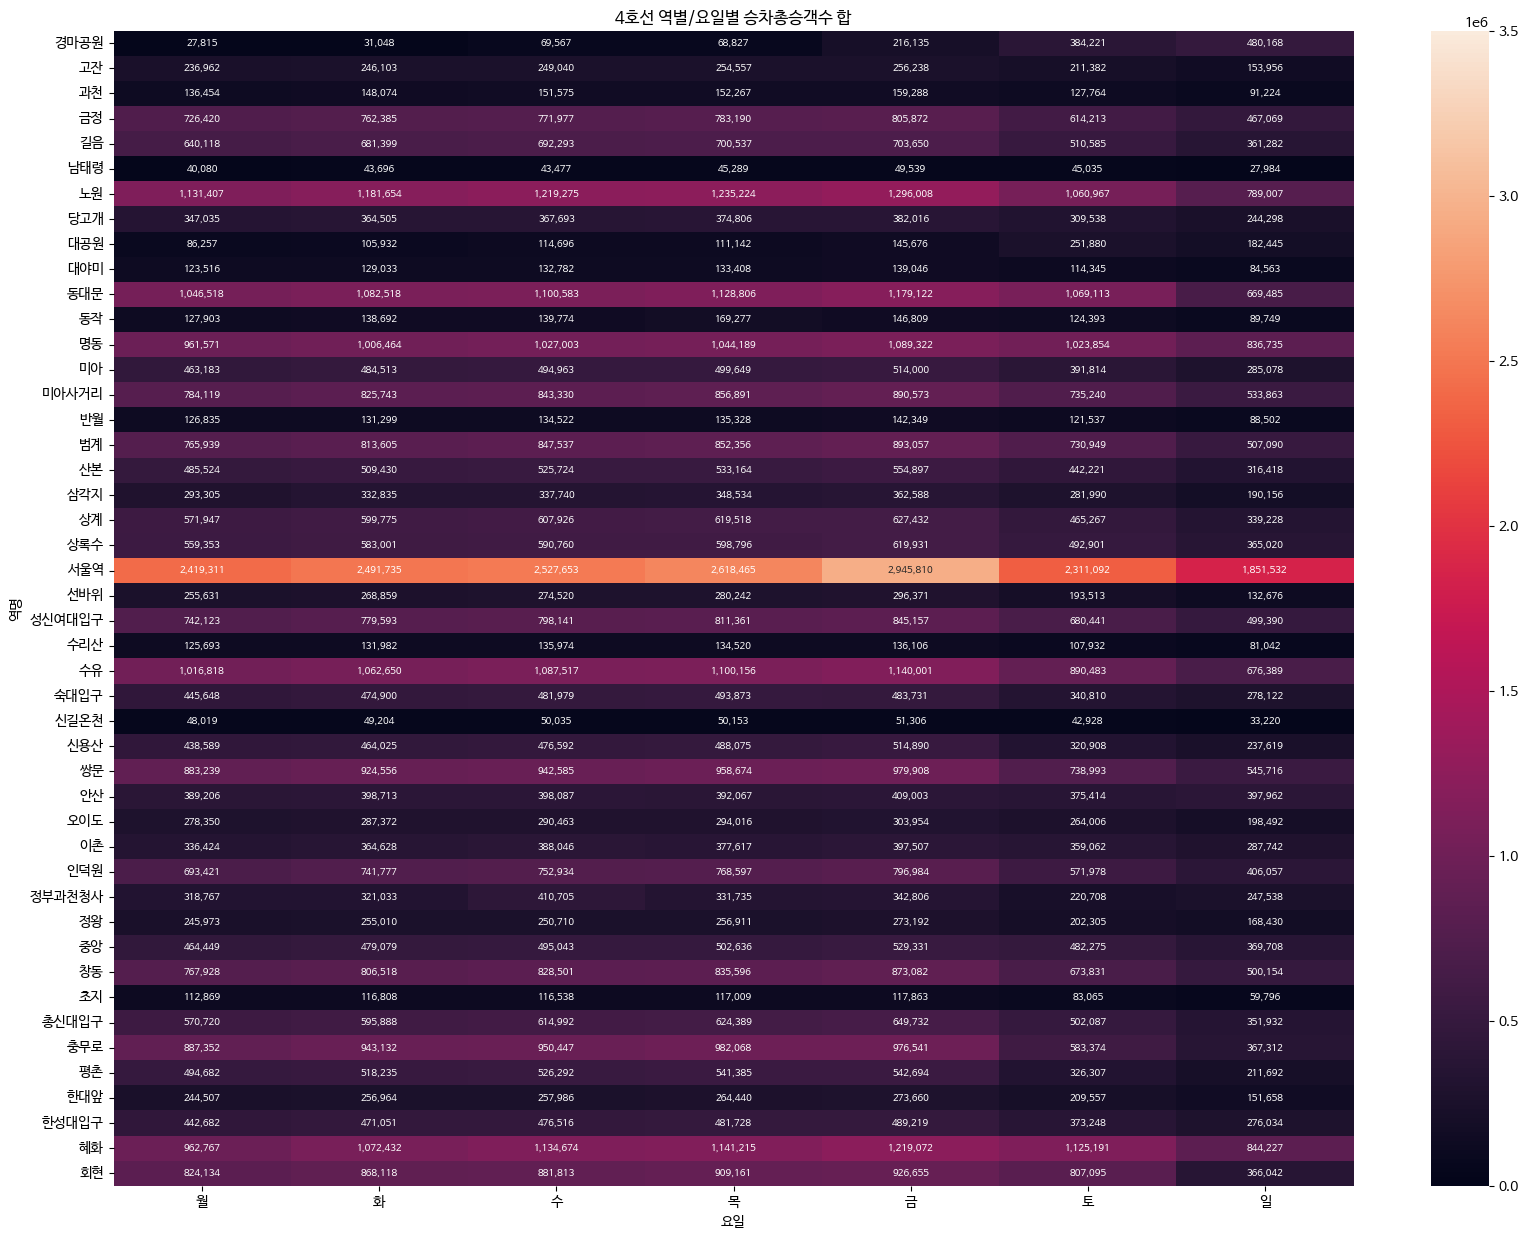

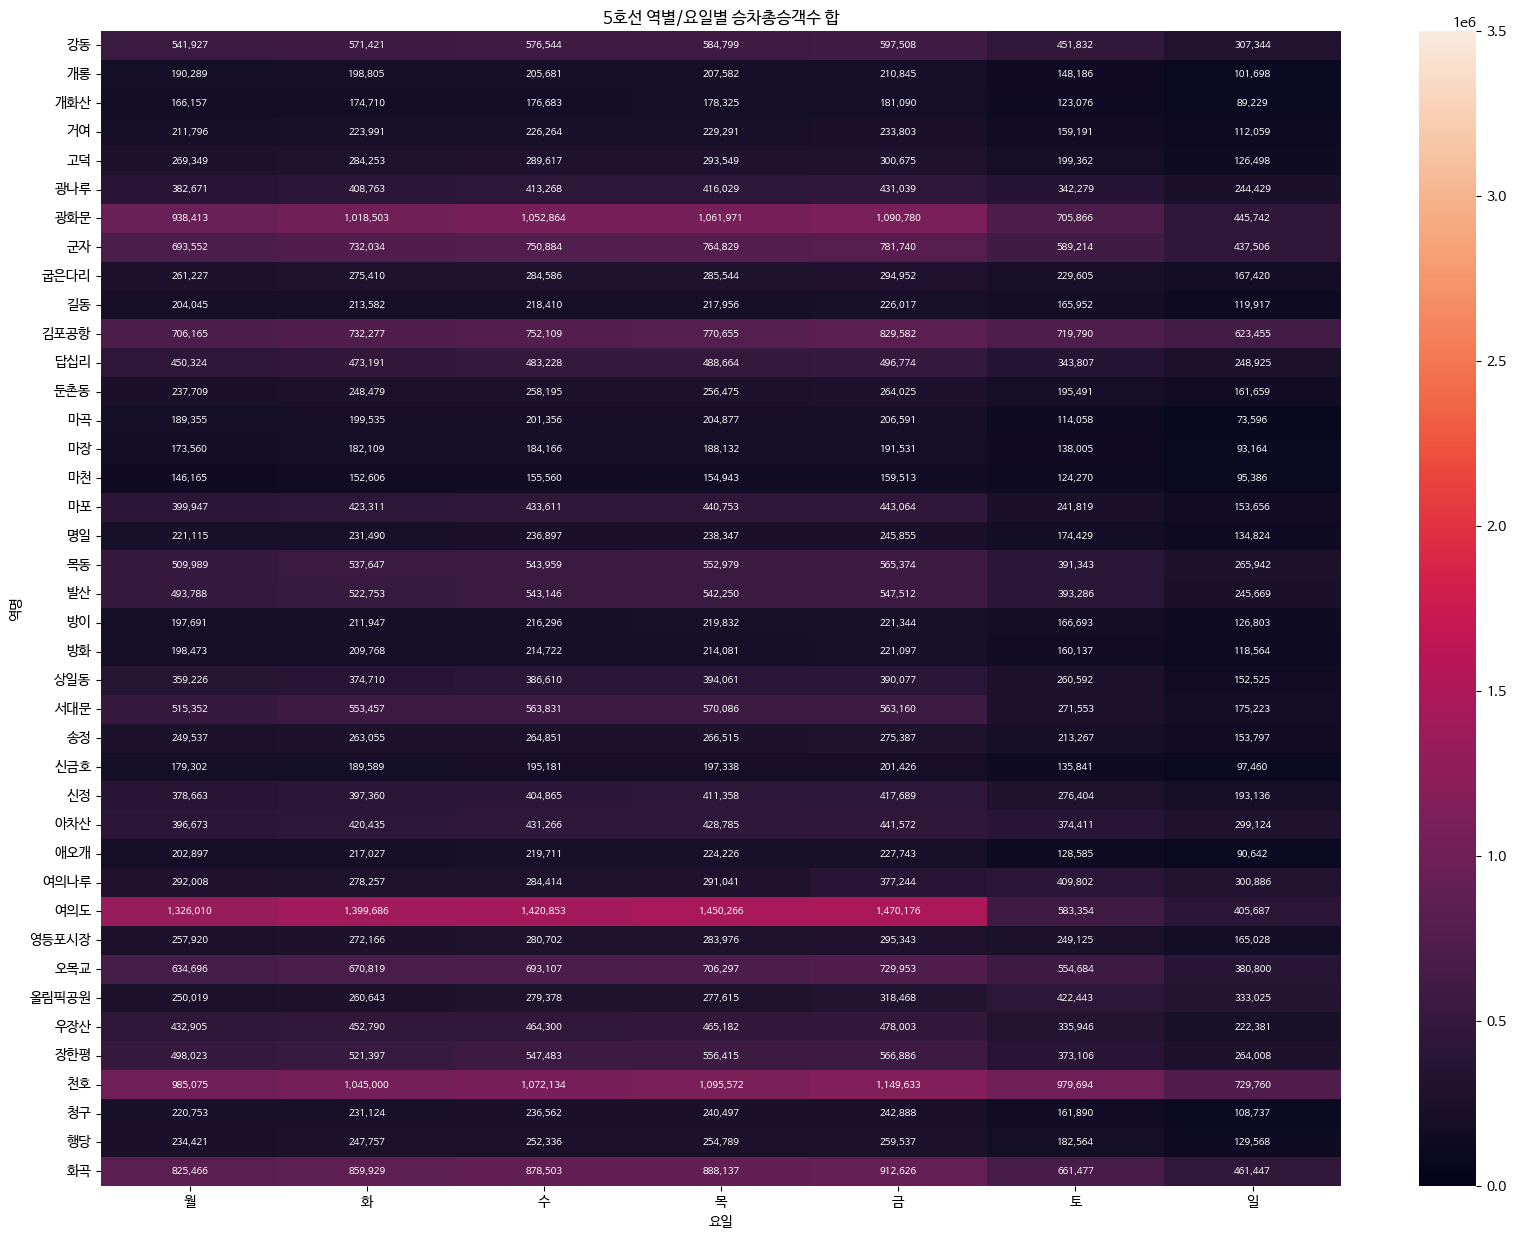

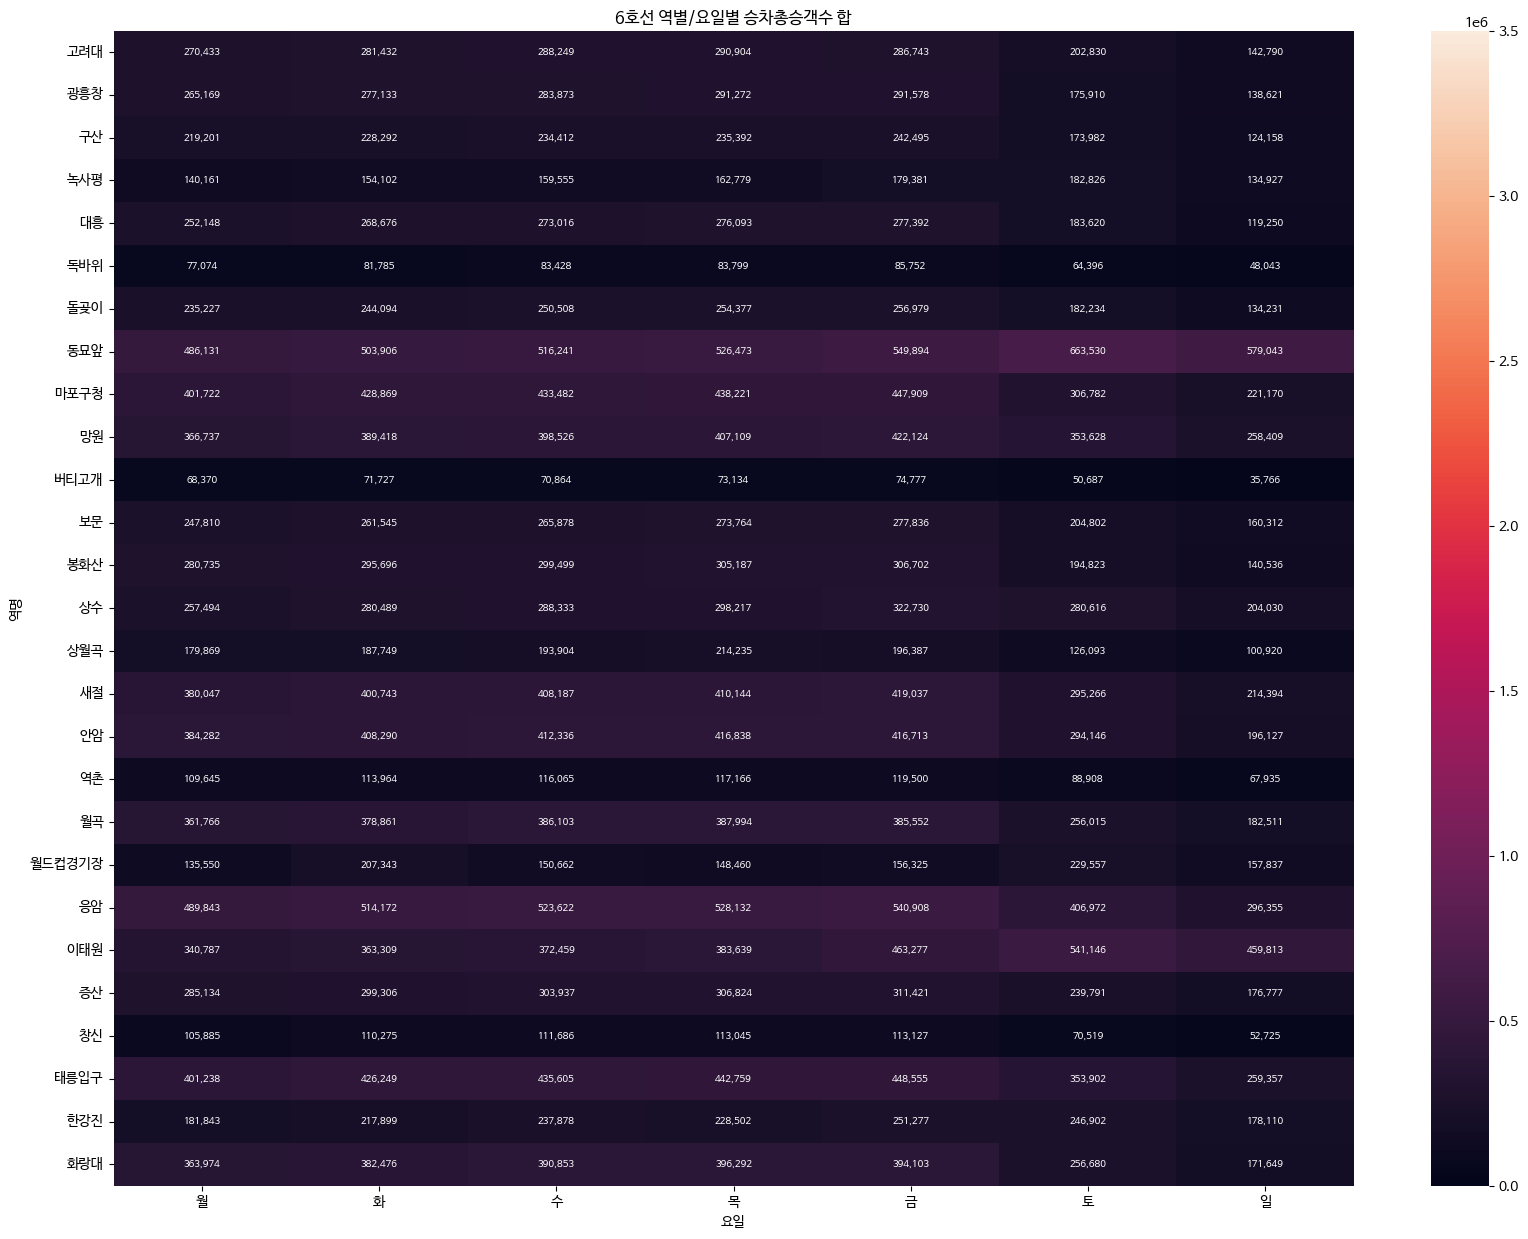

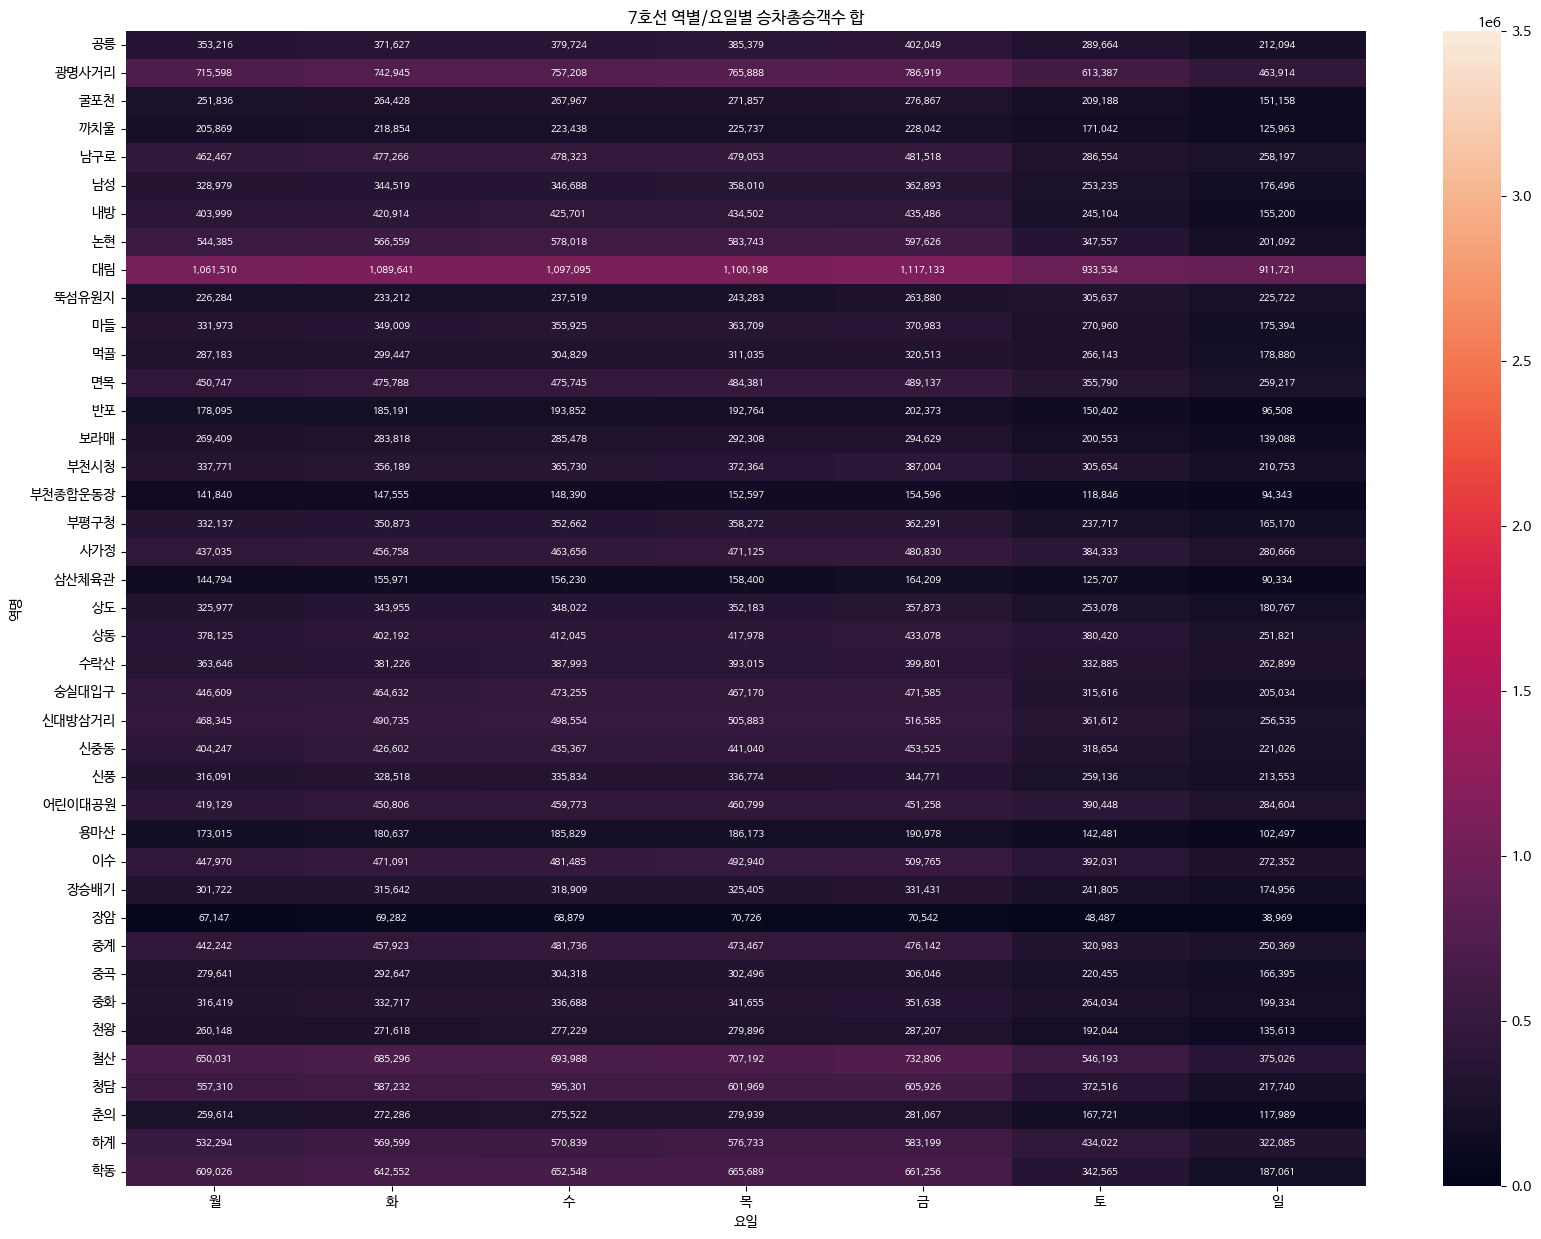

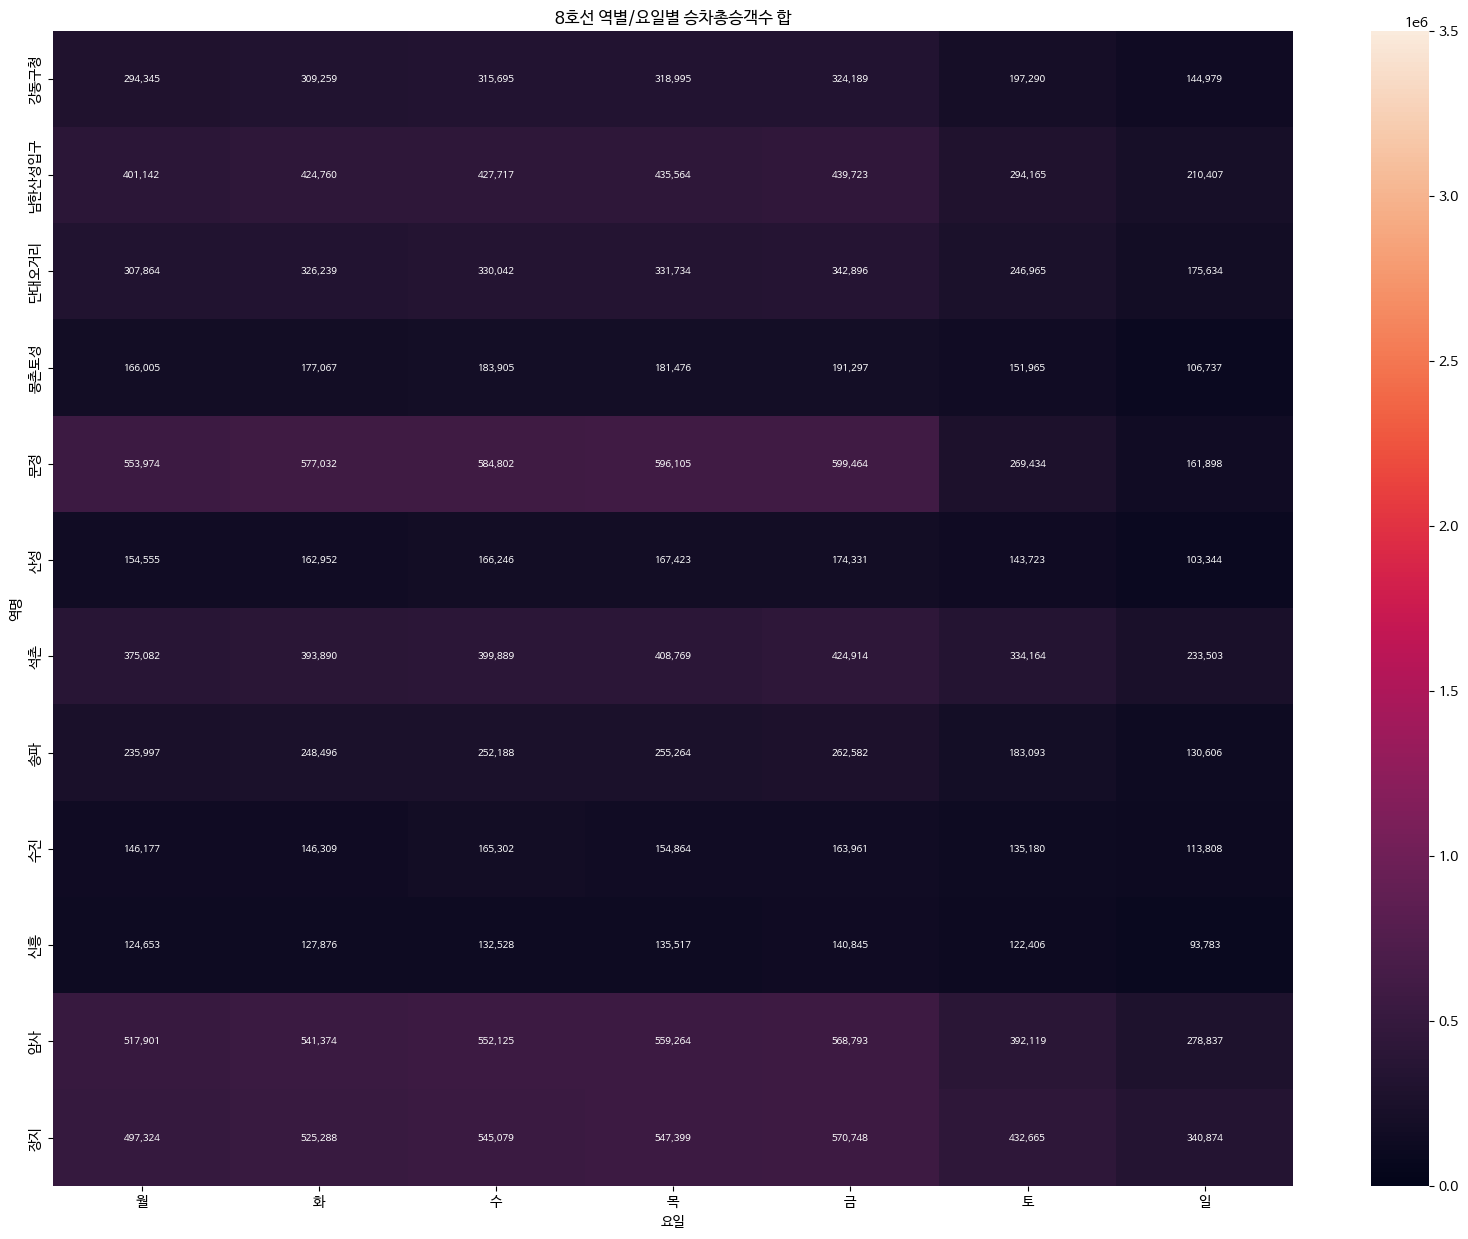

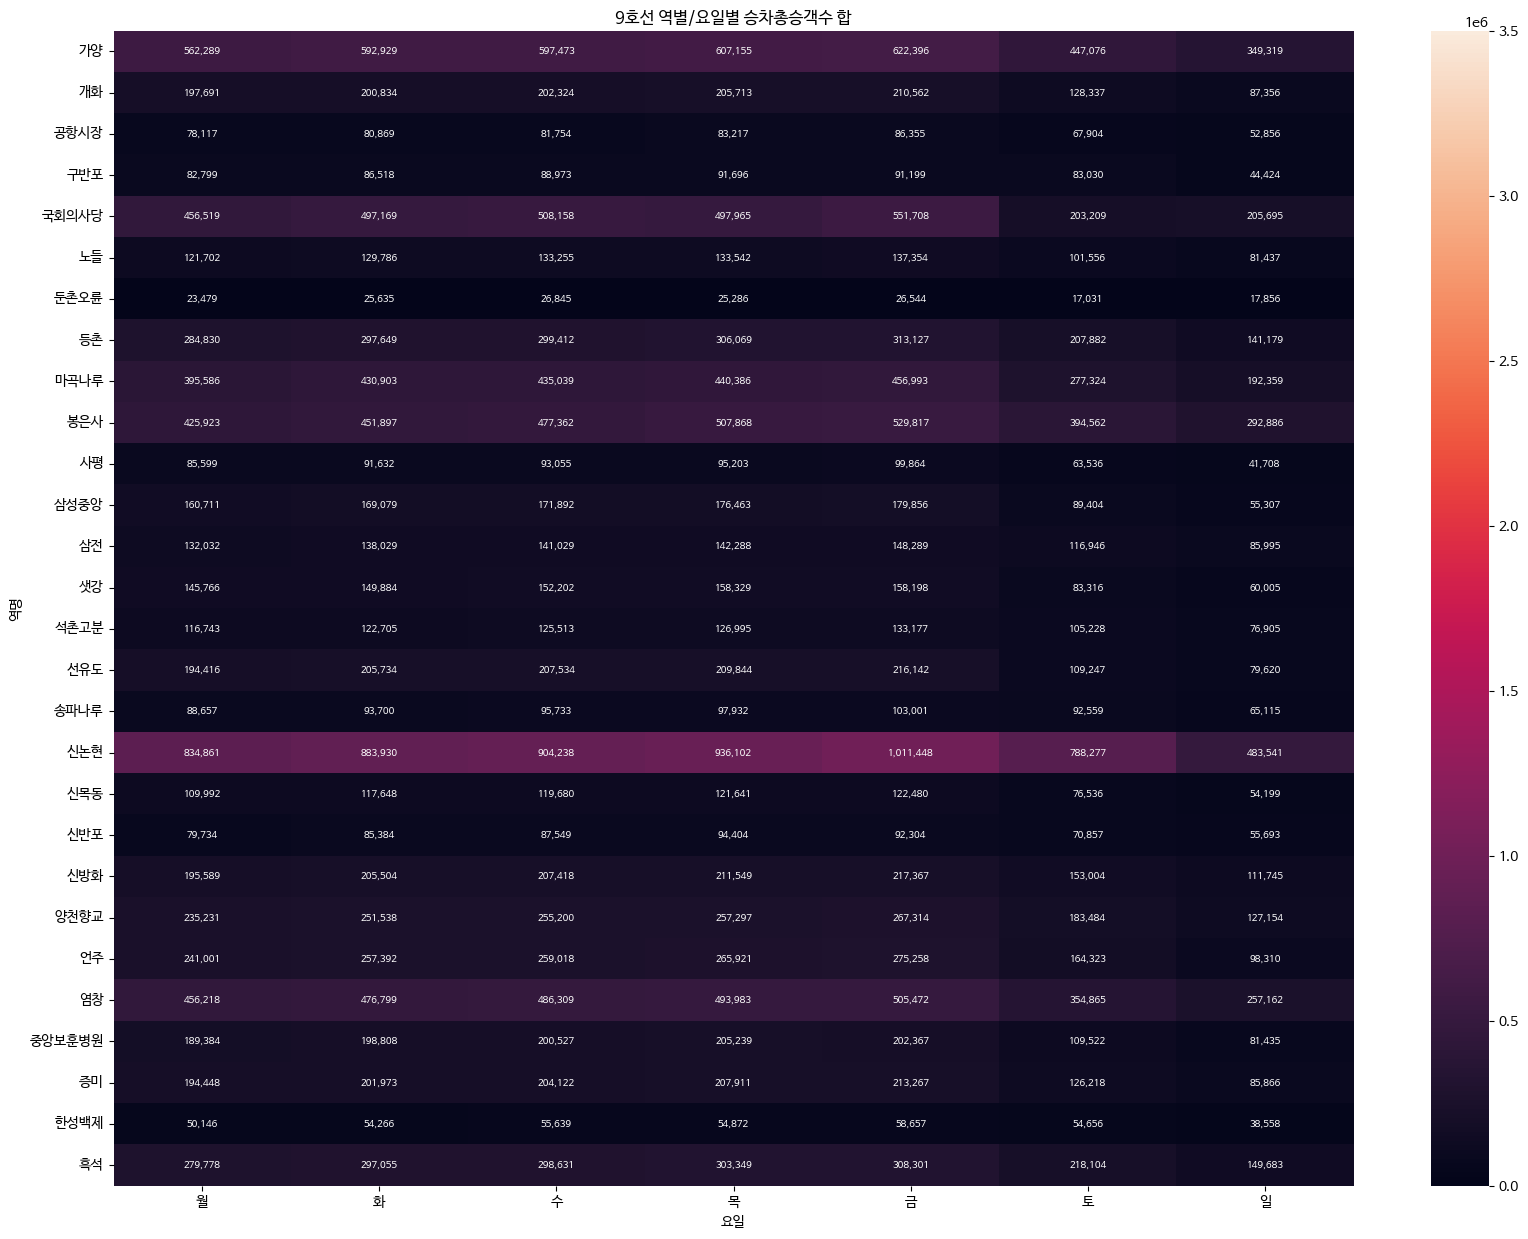

In [ ]:
for route in range(1, 10):

    dfPivot = subway_raw[subway_raw["노선명"] == f"{route}호선"].pivot_table(index="역명", columns="요일", values="승차총승객수", aggfunc = 'sum')

    dfPivot = dfPivot.reindex(columns=["월", "화", "수", "목", "금", "토", "일"])
    plt.figure(figsize=(20,15))
    norm = colors.Normalize(vmin=0, vmax=3500000) # 스케일 지정
    sns.heatmap(dfPivot, annot=True, fmt=',.0f', annot_kws={"fontsize": 7}, norm=norm)
    plt.title(f"{route}호선 역별/요일별 승차총승객수 합")


<h1>Q) 1호선에서 가장 하차를 많이하는 역은? (groupby)</h1>

In [ ]:
group_station_1=subway_raw.query('노선명=="1호선"')\
                            .groupby('역명')['하차총승객수'].agg(['sum'])\
                            .sort_values('sum', ascending=False)
group_station_1=group_station_1.head(5)
group_station_1

,sum
역명,
가산디지털단지,10571381.0
수원,10226609.0
영등포,9432067.0
용산,7817685.0
노량진,7603258.0


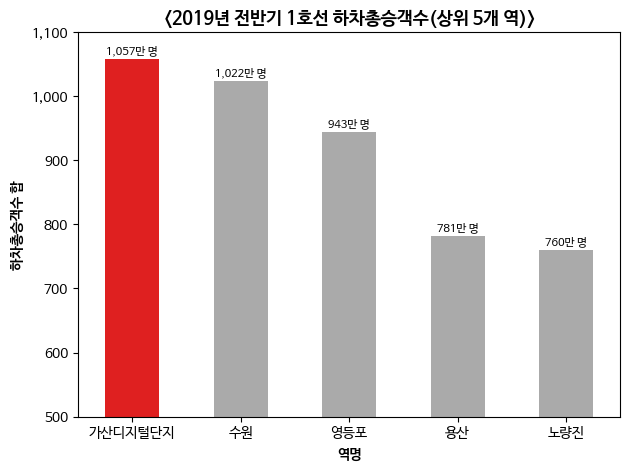

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.rc('font', family='NanumBarunGothic')
palette = ['#aaaaaa' if (x < max(group_station_1['sum'])) else '#ff0000' for x in group_station_1['sum']]
splot = sns.barplot(x=group_station_1.index, y=group_station_1['sum']/10000,
                    hue=group_station_1.index, palette=palette, width=0.5)
splot.set(ylim=(500,1100))
plt.ticklabel_format(style='plain', axis='y')
plt.title('<2019년 전반기 1호선 하차총승객수(상위 5개 역)>', size=13, weight='bold')
plt.xlabel('역명', weight='bold')
plt.ylabel('하차총승객수 합', weight='bold')
## 천단위 콤마 표시(y축)
def yfunc(y, pos):
    s = '{:0,d}'.format(int(y))
    return s
y_format = tkr.FuncFormatter(yfunc)
ax.yaxis.set_major_formatter(y_format)
## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}만 명".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 6),
                   textcoords='offset points')
plt.show()

<h1>Q) 2호선 중에서 어느 역에서 승차가 가장 많이 발생할까? (Folium역 표시)</h1>

In [ ]:
file1 = r'/content/drive/MyDrive/실습/지하철노선위경도정보2.csv'
subway_geo_raw = pd.read_csv(file1)

In [ ]:
subway_geo_2=subway_geo_raw.query('호선=="2호선" and 역지역=="수도권"')\
                            .reset_index(drop=True)
subway_geo_2.rename(columns={'역이름':'역명'}, inplace=True)
subway_geo_2.head(3)

,역명,역지역,위도,경도,호선
0,낙성대,수도권,37.477090,126.963506,2호선
1,서울대입구,수도권,37.481285,126.952695,2호선
2,강변,수도권,37.535118,127.094723,2호선


In [ ]:
group_station_2=subway_raw.query('노선명=="2호선"')\
                            .groupby('역명',as_index = False)\
                            .agg(역별_승차총승객수=('승차총승객수', 'sum'))\
                            .reset_index(drop=True)
group_station_2.head(3)

,역명,역별_승차총승객수
0,강남,18148024.0
1,강변,8267462.0
2,건대입구,11123655.0


In [ ]:
merge_outer=pd.merge(subway_geo_2, group_station_2, how='inner', on='역명')\
                  .sort_values('역별_승차총승객수', ascending=False)
merge_outer.head(3)

,역명,역지역,위도,경도,호선,역별_승차총승객수
40,잠실,수도권,37.513309,127.100215,2호선,18574323.0
15,강남,수도권,37.498085,127.027978,2호선,18148024.0
9,홍대입구,수도권,37.556864,126.923765,2호선,17270084.0


In [ ]:
max_station=merge_outer.head(1)
max_station['역명'].values

array(['잠실'], dtype=object)

In [ ]:
myMap = folium.Map(location=[max_station['위도'], max_station['경도']], zoom_start=11)

folium.Marker([max_station['위도'], max_station['경도']],
  popup = '잠실',
  tooltip = '잠실',
  icon=folium.Icon(color='red', icon='info-sign')).add_to(myMap)

## 히트맵 표시
HeatMap(
    zip(merge_outer['위도'], merge_outer['경도'], merge_outer['역별_승차총승객수']),
    radius=20,
).add_to(myMap)

myMap
## myMap.save('/content/drive/MyDrive/실습/max_from_line2.html')

/usr/local/lib/python3.10/dist-packages/folium/utilities.py:69: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(coord)
/usr/local/lib/python3.10/dist-packages/folium/utilities.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if math.isnan(float(coord)):
/usr/local/lib/python3.10/dist-packages/folium/utilities.py:79: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(x) for x in coords]
